In [53]:
# All module imports
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from sklearn.model_selection import train_test_split
import random

In [11]:
# Initialize data set directory name and allowed image file extensions
dataSetDir = "Data Set"
imageExt = ["jpg","png","jpeg","webp"]
newImageSize = (256,256)

In [12]:
# Prevent tensorflow from using all GPU resources
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Cosmetic Statement. Only changes how prints are displayed
np.set_printoptions(linewidth=200)

In [13]:
# Reads all images from all directories within the dataset directory, and puts them into features and labels
classLabel = 0
features = []
labels = []
for imageDir in os.listdir(dataSetDir):
    for image in os.listdir(os.path.join(dataSetDir,imageDir)):
        if image.split(".")[-1] in imageExt:
            imagePath = os.path.join(dataSetDir,imageDir,image)
            image = cv2.cvtColor(cv2.imread(imagePath),cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,newImageSize)
            #print(image)
            features.append(image)
            labels.append(classLabel)
            #plt.imshow(image)
            #plt.show()
    classLabel+=1

# Shuffle the features and labels together, unpack them, then normalize the feature sizes from 0-255 to 0-1 pixels
#dataSet = list(zip(features,labels))
#np.random.shuffle(dataSet)
#features, labels = zip(*dataSet)
features = np.array(features)
labels = np.array(labels)
features = features / 255

In [14]:
trainingImages, testImages, trainingLabels, testLabels = train_test_split(
    features, labels, test_size=0.3, random_state = 42)
#i = 25
#plt.title(trainingLabels[i])
#plt.imshow(trainingImages[i])

In [67]:
model = Sequential()
# Input Layer
model.add(Conv2D(64, (3,3), input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(2,2))
# Hidden Layers
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
# Output Layer
model.add(Dense(6,activation = "softmax"))
# Compile and summarize the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)       

In [68]:
model.fit(trainingImages,trainingLabels,epochs=9)
model.evaluate(testImages,testLabels)

Epoch 1/9
3/3 [==============================] - 19s 5s/step - loss: 4.2708 - accuracy: 0.0750
Epoch 2/9
3/3 [==============================] - 16s 5s/step - loss: 1.7624 - accuracy: 0.2875
Epoch 3/9
3/3 [==============================] - 16s 5s/step - loss: 1.7102 - accuracy: 0.2875
Epoch 4/9
3/3 [==============================] - 17s 5s/step - loss: 1.4422 - accuracy: 0.5125
Epoch 5/9
3/3 [==============================] - 17s 5s/step - loss: 1.1675 - accuracy: 0.5625
Epoch 6/9
3/3 [==============================] - 19s 5s/step - loss: 1.0114 - accuracy: 0.5625
Epoch 7/9
3/3 [==============================] - 17s 5s/step - loss: 0.7373 - accuracy: 0.7375
Epoch 8/9
3/3 [==============================] - 17s 5s/step - loss: 0.4682 - accuracy: 0.8875
Epoch 9/9
2/2 [==============================] - 2s 178ms/step - loss: 0.8474 - accuracy: 0.7143


[0.8474445939064026, 0.7142857313156128]

In [ ]:
results = np.array(model.predict(testImages))
plt.imshow(testImages[5])
for i in range(len(testLabels)):
    print(testLabels[i],":",results[i],":",max(results[i]))

In [1]:
!git clone https://github.com/karmashon/SmartCart.git

Cloning into 'SmartCart'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 185 (delta 11), reused 91 (delta 8), pack-reused 87
Receiving objects: 100% (185/185), 7.58 MiB | 18.39 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [69]:
model.save("./Models/model_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Function to take photo
def takePhoto():
  camera = cv2.VideoCapture(0)
  if not camera.isOpened():
    return False

  status, image = camera.read()

  if status == False:
    camera.release()
    return False

  image = cv2.resize(image, (256,256))
  plt.imshow()
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



In [70]:
model2 = tf.keras.models.load_model("./Models/model_1.h5")

AxesImage(size=(256, 256))
1/1 [==============================] - 0s 163ms/step
[[2.2718806e-03 2.5909924e-04 9.8492296e-07 7.5680407e-05 9.9720532e-01 1.8702842e-04]]
Horlicks 0.9972053


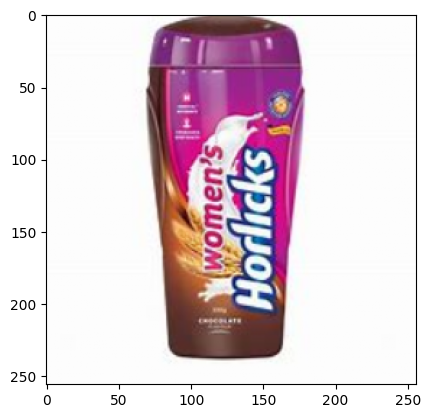

In [86]:
x = 0
image = testImages[x].reshape(1,256,256,3)
print(plt.imshow(testImages[x]))
res  = model2.predict(image, batch_size=1)
maxIndex = 0
print(res)
for i in range(len(res[0])):
  if res[0][i]>res[0][maxIndex]:
    maxIndex = i

di = {0 : "Apple", 1 : "Banana", 2 : "Book", 3 : "Bottle", 4: "Horlicks", 5:"Pen"}
print(di[maxIndex],res[0][maxIndex])